In [ ]:
!pip install pymysql

In [15]:
import pandas as pd
import pymysql ##ODBC to connect to python

In [16]:
conn = pymysql.connect(host = 'localhost',port = int(3306),user = 'root',password='',db = 'batch59')

In [17]:
conn

In [18]:
df = pd.read_sql_query('select * from heart',conn)

In [19]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [21]:
df.shape

(303, 14)

In [22]:
data2= df.copy()
data2.head(15)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


    data preprocessing


In [23]:
####1. find duplicate rows
duplicate_row = data2[data2.duplicated()]
duplicate_row

## it has only 1 duplicate row 
## now we need to remove this duplicate row


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [30]:
##the data contains 1 duplicated row ,we will remove the duplicated row and check for duplicates again 


In [24]:
##2 removing duplicate rows
data2 = data2.drop_duplicates()
duplicate_row = data2[data2.duplicated()]
duplicate_row.shape

(0, 14)

In [25]:
data2.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [27]:
## 3 checking of outliers 
import seaborn as sns


<AxesSubplot:xlabel='age'>

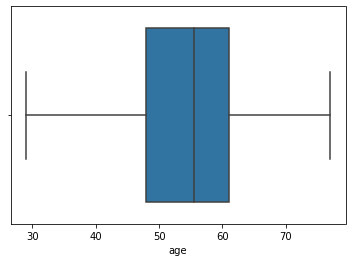

In [30]:
sns.boxplot(x= data2['age'])  ##there is no outliers


<AxesSubplot:xlabel='cp'>

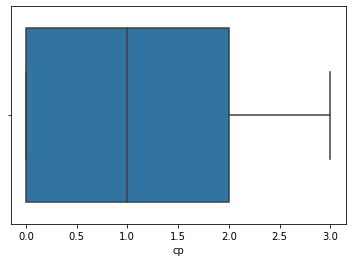

In [32]:
sns.boxplot(x= data2['cp']) ##there is no outliers

<AxesSubplot:xlabel='trtbps'>

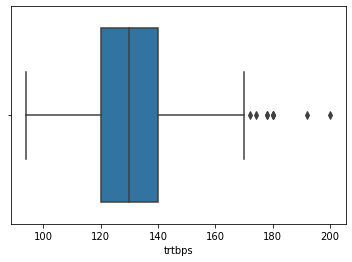

In [34]:
sns.boxplot(x=data2['trtbps'])  ##there is outliers,they need to remove

<AxesSubplot:xlabel='chol'>

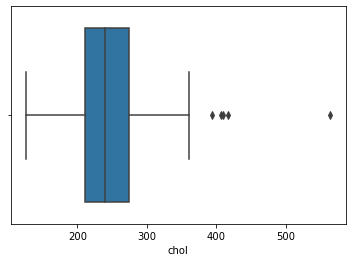

In [35]:
sns.boxplot(x=data2['chol'])   ##there is outliers,they need to remove

<AxesSubplot:xlabel='fbs'>

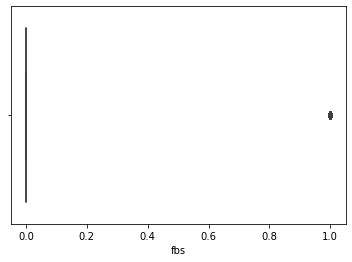

In [36]:
sns.boxplot(x=data2['fbs'])

<AxesSubplot:xlabel='thalachh'>

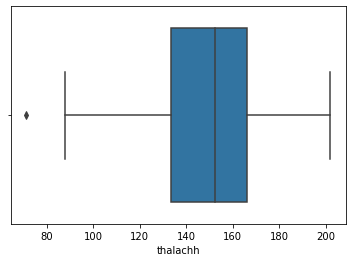

In [37]:
sns.boxplot(x=data2['thalachh'])  ##there is outliers,they need to remove

<AxesSubplot:xlabel='oldpeak'>

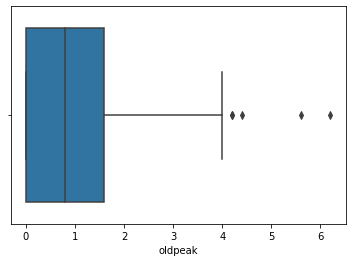

In [38]:
sns.boxplot(x=data2['oldpeak'])  ##there is outliers,they need to remove

from boxplot we get outliers from trtbps,chol,thalachh,oldpeak

To remove outliers there are two method 1.IQR and 2.Z-score(standard deviation)

# 1 . IQR 


In [45]:
### declaring the Q1 and Q3 and finding IQR
q1 = data2.quantile(0.25)
q3 = data2.quantile(0.75)
iqr = q3-q1
iqr

age         13.00
sex          1.00
cp           2.00
trtbps      20.00
chol        63.75
fbs          0.00
restecg      1.00
thalachh    32.75
exng         1.00
oldpeak      1.60
slp          1.00
caa          1.00
thall        1.00
output       1.00
dtype: float64

In [51]:
data2.shape

(302, 14)

In [52]:
## removig outliers using IQR
data3 = data2[~((data2<(q1-1.5*iqr))|(data2>(q3+1.5*iqr))).any(axis=1)]

## in above we use ~ this sign that represent remove method
## here we deleted data below IQR and above IQR
## any.axis=1 show that do for all columns


data3.shape



(228, 14)

now check the ouliers using the boxplots

<AxesSubplot:xlabel='chol'>

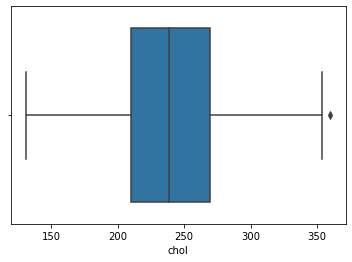

In [57]:
sns.boxplot(x=data3['chol'])  ##there is outliers,they reduce the number as outliers as compare to previous

# 2 . Z -Score

if Z-score is greter than 3 ,it implies that the data point differs from the other data point
hence it treated as ouliers

In [58]:
## import the libraries
import numpy as np
from scipy import stats

##Zscore formula
## zscore= x-mean/standardDeviation

In [60]:
z = np.abs(stats.zscore(data2))  ## declare the absolute value and get the z score
z

array([[0.94979429, 0.68265615, 1.97647049, ..., 0.71491124, 2.1479552 ,
        0.91731315],
       [1.92854796, 0.68265615, 1.005911  , ..., 0.71491124, 0.51399432,
        0.91731315],
       [1.48572607, 1.46486632, 0.0353515 , ..., 0.71491124, 0.51399432,
        0.91731315],
       ...,
       [1.50332164, 0.68265615, 0.93520799, ..., 1.27497996, 1.11996657,
        1.09014026],
       [0.28556146, 0.68265615, 0.93520799, ..., 0.28003436, 1.11996657,
        1.09014026],
       [0.28556146, 1.46486632, 0.0353515 , ..., 0.28003436, 0.51399432,
        1.09014026]])

In [63]:
###here we remove the colums which score is more than 3
data4 = data2[(z<3).all(axis=1)]
data4.shape ##here this is data after removing outlier by Z-score

(287, 14)

In [64]:
data3.shape ##here this is data after removing outlier by IQR

(228, 14)

# 3.Correlation


<AxesSubplot:>

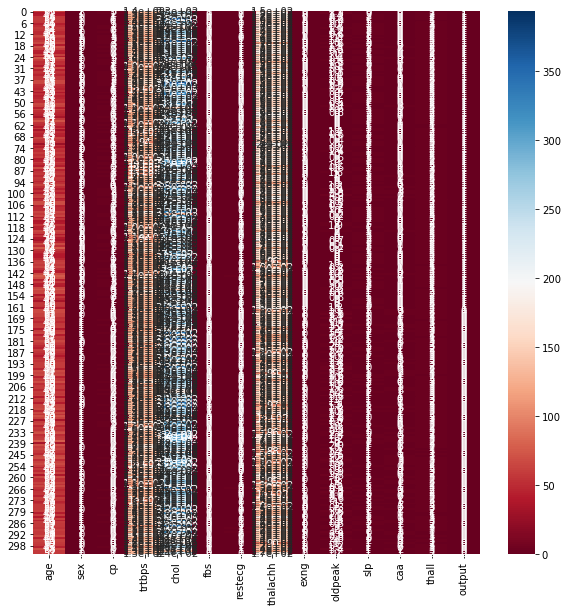

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(data4,annot=True,cmap='RdBu')

In [71]:
data4.corr()['output']

age        -0.226750
sex        -0.302926
cp          0.408570
trtbps     -0.119281
chol       -0.099821
fbs        -0.011438
restecg     0.130079
thalachh    0.431519
exng       -0.429082
oldpeak    -0.424443
slp         0.323948
caa        -0.463258
thall      -0.354579
output      1.000000
Name: output, dtype: float64

# our data is ready now we just need to create function to train the model

Logistic regression classifiers,decision tree classifiers,random forest classifiers,k nearest classifiers

1. logistic regression

In [81]:
##1. logistic regression
def Logistic(x,y):
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=1234)
    logistic = LogisticRegression()
    train = logistic.fit(x_train,y_train)
    pred = train.predict(x_test)
    result = accuracy_score(y_test,pred)*100
    print('accuracy score of logistic regression :',result)
    

In [74]:
data3.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [79]:
x = data3[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = data3[['output']]


,output
1,1
2,1
3,1
4,1
5,1
...,...
296,0
298,0
299,0
301,0


In [82]:
## Logistic(x,y) ##here we get aacuracy of 84 percentage

accuracy score of logistic regression : 84.05797101449275


C:\Users\Ashwin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ashwin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2.K Nearest neibours

In [85]:
##
def Knn(x,y):
    from sklearn.model_selection import train_test_split
    ##from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=1234)
    knn = KNeighborsClassifier()
    train = knn.fit(x_train,y_train)
    pred = train.predict(x_test)
    result = accuracy_score(y_test,pred)*100
    print('accuracy score of knn  :',result)
    

In [86]:
Knn(x,y)

C:\Users\Ashwin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


accuracy score of knn  : 59.42028985507246


3 .decision Tree



In [87]:
def DecisonTree(x,y):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.tree import DecisionTreeClassifier
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1234)
    tree = DecisionTreeClassifier()
    train = tree.fit(x_train,y_train)
    pred = train.predict(x_test)
    accuracy = accuracy_score(y_test,pred)*100
    print('accuracy score of decision tree is ',accuracy)
    
    

In [88]:
DecisonTree(x,y)

accuracy score of decision tree is  84.78260869565217


4. Random Forest

In [99]:
def Random(x,y):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    ##from sklearn.tree import DecisionTreeClassifier
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1234)
    random = RandomForestClassifier()
    train = random.fit(x_train,y_train)
    pred = train.predict(x_test)
    accuracy = accuracy_score(y_test,pred)*100
    print('accuracy score of random forest tree is ',accuracy)

In [95]:
Random(x,y)

<ipython-input-94-c00113ba9063>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  train = random.fit(x_train,y_train)


accuracy score of decision tree is  86.95652173913044


after training the model predict the output in python and create database in sql and create data visualization in tableau